# DOC による異常検知



## 環境の確認

In [1]:
!cat /etc/issue

Ubuntu 18.04.3 LTS \n \l



In [2]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        527M         10G        892K        1.9G         11G
Swap:            0B          0B          0B


In [3]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits 

In [4]:
!nvidia-smi

Thu Sep 26 01:13:50 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
!python --version

Python 3.6.8


In [0]:
from logging import Logger


def get_logger() -> Logger:
    import logging
    logger = logging.getLogger(__name__)

    fmt = "%(asctime)s %(levelname)s %(name)s :%(message)s"
    logging.basicConfig(level=logging.DEBUG, format=fmt)

    return logger


logger = get_logger()

In [7]:
def check_tf_version() -> None:
    import tensorflow as tf
    logger.info(tf.__version__)


check_tf_version()

2019-09-26 01:13:54,247 INFO __main__ :1.14.0


## ソースコードの取得

In [8]:
# 対象のコードを取得
!git clone -n https://github.com/iimuz/til.git
%cd til
!git checkout f0499f9
%cd python/doc_tensorflow

Cloning into 'til'...
remote: Enumerating objects: 473, done.
remote: Counting objects: 100% (473/473), done.
remote: Compressing objects: 100% (316/316), done.
remote: Total 473 (delta 153), reused 441 (delta 128), pack-reused 0
Receiving objects: 100% (473/473), 1.73 MiB | 5.53 MiB/s, done.
Resolving deltas: 100% (153/153), done.
/content/til
Note: checking out 'f0499f9'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at f0499f9 fix: RGB への変換で画像が uint8 ではないために適切に変換できていなかったので修正
/content/til/python/doc_tensorflow


## 実行

4423680/4422102 [==============================] - 0s 0us/step


2019-09-26 01:13:59,109 INFO dataset :x_train_s: length = 6000, shape = (28, 28, 1)
2019-09-26 01:13:59,110 INFO dataset :x_ref: length = 54000, shape = (28, 28, 1)
2019-09-26 01:13:59,111 INFO dataset :y_ref: length = 54000, shape = ()
2019-09-26 01:13:59,220 INFO dataset :x: length = 6000, shape = (28, 28, 1)
2019-09-26 01:13:59,222 INFO dataset :y: length = 6000, shape = ()
2019-09-26 01:14:04,490 INFO __main__ :bulid model...
2019-09-26 01:14:04,554 WARNING tensorflow :From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


8339456/8331712 [==============================] - 1s 0us/step


2019-09-26 01:14:16,865 INFO __main__ :x_target shape is (6000, 96, 96, 3)
2019-09-26 01:14:16,867 INFO __main__ :x_ref shape is (6000, 96, 96, 3)
2019-09-26 01:14:16,869 INFO __main__ :training...


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 16)   432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 16)   64          Conv1[0][0]                      
______________________________________________________________________________________________

2019-09-26 01:14:17,557 WARNING tensorflow :From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2019-09-26 01:14:33,327 INFO __main__ :epoch: 0
2019-09-26 01:14:33,333 INFO __main__ :Descriptive loss: 2.302635431289673
2019-09-26 01:14:33,335 INFO __main__ :Compact loss: 1.0231425221718382e-05
2019-09-26 01:14:39,561 INFO __main__ :epoch: 1
2019-09-26 01:14:39,562 INFO __main__ :Descriptive loss: 2.3025171756744385
2019-09-26 01:14:39,563 INFO __main__ :Compact loss: 1.0272655345033854e-05
2019-09-26 01:14:45,818 INFO __main__ :epoch: 2
2019-09-26 01:14:45,819 INFO __main__ :Descriptive loss: 2.302506923675537
2019-09-26 01:14:45,820 INFO __main__ :Compact loss: 1.043496286001755e-05
2019-09-26 01:14:51,984 INFO __main__ :epoch: 3


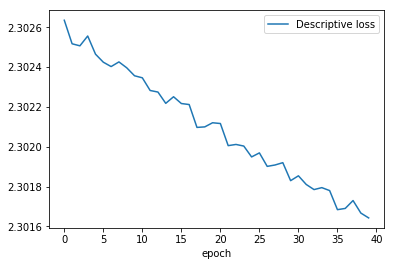

2019-09-26 01:18:49,236 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:18:49,340 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:18:49,389 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:18:49,413 DEBUG matplotlib.axes._base :update_title_pos


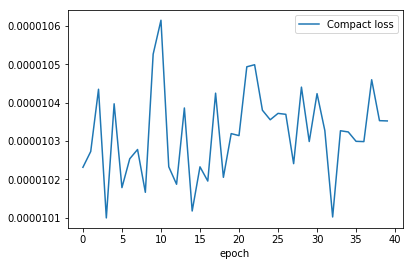

In [9]:
%run -i train.py

2019-09-26 01:18:50,969 INFO dataset :x_train_s: length = 6000, shape = (28, 28, 1)
2019-09-26 01:18:50,971 INFO dataset :x_ref: length = 54000, shape = (28, 28, 1)
2019-09-26 01:18:50,972 INFO dataset :y_ref: length = 54000, shape = ()
2019-09-26 01:18:51,090 INFO dataset :x: length = 6000, shape = (28, 28, 1)
2019-09-26 01:18:51,092 INFO dataset :y: length = 6000, shape = ()
2019-09-26 01:18:54,429 WARNING tensorflow :From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2019-09-26 01:18:54,430 WARNING tensorflow :From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a futu

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 16)   432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 16)   64          Conv1[0][0]                      
______________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


<Figure size 432x288 with 0 Axes>

2019-09-26 01:21:02,273 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,301 DEBUG matplotlib.font_manager :findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2019-09-26 01:21:02,307 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,334 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,362 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,390 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,454 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,485 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,515 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,539 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:02,558 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01

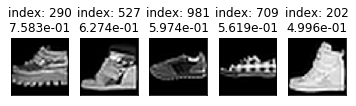

<Figure size 432x288 with 0 Axes>

2019-09-26 01:21:02,978 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,002 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,027 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,052 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,076 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,138 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,168 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,194 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,218 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,238 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,296 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,316 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,336 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,355 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,

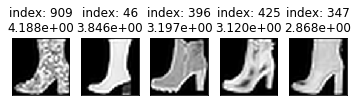

<Figure size 432x288 with 0 Axes>

2019-09-26 01:21:03,634 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,670 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,704 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,741 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,773 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,832 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,857 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,885 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,908 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,929 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:03,987 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,007 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,025 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,046 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,

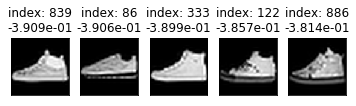

<Figure size 432x288 with 0 Axes>

2019-09-26 01:21:04,334 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,359 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,387 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,413 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,437 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,499 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,526 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,560 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,939 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:04,959 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:05,023 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:05,043 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:05,065 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:05,086 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:05,

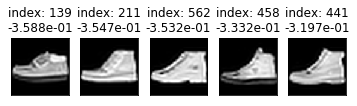

2019-09-26 01:21:05,334 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:05,444 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:05,491 DEBUG matplotlib.axes._base :update_title_pos
2019-09-26 01:21:05,519 DEBUG matplotlib.axes._base :update_title_pos


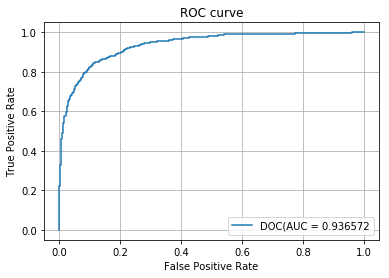

In [10]:
%run -i predict.py